<a href="https://colab.research.google.com/github/DomCook33/Project1/blob/main/Project1DominicCook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project \#1 Starter Code:
Your first step is to decide which dataset you would like to work with for this project.

For this project, you will get to choose what dataset you use. The ones we've used in class (other than Iris/Titanic as they're pretty small) are all fair game (wine quality, breast cancer, spotify).

Here are some other possibilities--Kaggle has many many more. It might be a good idea to double check with me before grabbing a dataset that's not listed here:
- 🥑 [Avocado Prices](https://www.kaggle.com/datasets/neuromusic/avocado-prices)
- 🎟️ [Admission to University](https://www.kaggle.com/datasets/akshaydattatraykhare/data-for-admission-in-the-university)
- 🏎️ [Speed Dating](https://www.kaggle.com/datasets/whenamancodes/speed-dating)
- 🎓 [World University Ranking](https://www.kaggle.com/datasets/whenamancodes/world-university-ranking-2022-2023)
- 📸 [Top Instagram Influencers](https://www.kaggle.com/datasets/whenamancodes/top-200-influencers-crushing-on-instagram)
- 🌦️ [Weather Prediction](https://www.kaggle.com/datasets/thedevastator/weather-prediction)
- 🤑 [Student Monthly Expenses](https://www.kaggle.com/datasets/shariful07/nice-work-thanks-for-share)
- 🍺 [Student Alcohol Consumption](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption)
- 🏫 [College Score Card](https://www.kaggle.com/datasets/thedevastator/u-s-department-of-education-college-scorecard-da)
- 🎮 [IMDB Video Games](https://www.kaggle.com/datasets/muhammadadiltalay/imdb-video-games)
- 🎵 [Spotify Recommendation](https://www.kaggle.com/datasets/bricevergnou/spotify-recommendation)

# Self-Evaluation:

| **Description/Writing** | **I think I deserve** |
|-------------------------|-----------------------|
| 1: Problem              | 2/2                    |
| 2: Data Prep            | 2/2                    |
| 3: Research             |10/10                   |
| 4: Analysis             | 9/10                   |
| 5: Bumps in the Road.   | 1/1                    |
| Total                   | 24/25                   |

# 1. Problem:
State the problem you are trying to solve with this machine learning experiment. Include a description of the data, where you got the data, and what you're trying to predict..

I chose the spotify data because my favorite thing to do is listen to music. The data includes a much of information about songs such as energy, tempo, danceability, liveness, and acousticness. I will be testing to see if the if the liveness and energy can predict the danceability of a song. My prediction is that as liveness increases the danceability of the song will also increase.


# 2. Data Preparation
Explain your data preparation. What did you have to do to get your data in shape for your experiments? Why are you certain that you data is clean and prepared for use in your algorithms?

I put my data that I will be using into a subset to make it easilly accessible. I also looked for null values in each column of the subset to make sure that it will be ready for use in my algorithms.

In [2]:
import sklearn
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

from google.colab import drive
drive.mount('/content/drive')

spotify_data = pd.read_csv('/content/drive/MyDrive/CS 167/datasets/data.csv')
spotify_data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


In [3]:
#making column subset
spotify = spotify_data[['danceability', 'liveness', 'energy']]
spotify

,danceability,liveness,energy
0,0.803,0.1000,0.6240
1,0.762,0.0912,0.7030
2,0.261,0.1020,0.0149
3,0.722,0.1230,0.7360
4,0.787,0.0753,0.5720
...,...,...,...
190,0.166,0.1190,0.0551
191,0.862,0.0465,0.6240
192,0.499,0.1180,0.3510
193,0.574,0.1940,0.7290


In [4]:
#checking to see if there are any null values in the danceability column
spotify.danceability.value_counts(dropna = False)

0.798    4
0.797    3
0.809    2
0.705    2
0.878    2
        ..
0.531    1
0.791    1
0.680    1
0.774    1
0.747    1
Name: danceability, Length: 169, dtype: int64

In [5]:
#checking to see if there are any null values in the liveness column
spotify.liveness.value_counts(dropna = False)

0.1050    6
0.1020    4
0.1010    4
0.1160    3
0.1190    3
         ..
0.0993    1
0.3680    1
0.2300    1
0.0831    1
0.3600    1
Name: liveness, Length: 151, dtype: int64

In [6]:
#checking to see if there are any null values in the energy column
spotify.energy.value_counts(dropna = False)

0.980    4
0.673    3
0.468    2
0.970    2
0.977    2
        ..
0.803    1
0.500    1
0.877    1
0.654    1
0.666    1
Name: energy, Length: 168, dtype: int64

# 3. Research

Put your code and your experiments here.

For full credit, your experiments should include the following models:
- __k Nearest Neighbors__
- __weighted k Nearest Neighbors__
- __decision tree__
- __random forest__

You need to demonstrate the performance of these models on both __normalized__ and __non-normalized__ data.

For each of the above models, you need to include a __graph of at least 1 tuned parameter__.


In [7]:
#splitting data into training data and testing data

target = 'danceability'
predictors = spotify.columns.drop(target)
train_data, test_data, train_sln, test_sln = train_test_split(spotify[predictors], spotify[target], test_size = 0.2, random_state=41)
train_data.head()

,liveness,energy
106,0.4530,0.934
55,0.0774,0.788
180,0.0623,0.468
179,0.1120,0.659
83,0.3590,0.341


Non-normalized Data

In [22]:
#unweighted kNN

knn_unweighted = neighbors.KNeighborsRegressor(n_neighbors = 25)

knn_unweighted.fit(train_data, train_sln)

preds = knn_unweighted.predict(test_data)

print("Mean Absolute Error: ", metrics.mean_absolute_error(test_sln, preds))

Mean Absolute Error:  0.1102379487179487


In [57]:
#weighted kNN

knn_weighted = neighbors.KNeighborsRegressor(n_neighbors = 25, weights = 'distance')

knn_weighted.fit(train_data, train_sln)

preds = knn_weighted.predict(test_data)

print("Mean Absolute Error: ", metrics.mean_absolute_error(test_sln, preds))

Mean Absolute Error:  0.1057275490133381


In [58]:
#decision tree

regressor = DecisionTreeRegressor(max_depth = 25)

regressor.fit(train_data, train_sln)

preds = regressor.predict(test_data)

print("Mean Absolute Error: ", metrics.mean_absolute_error(test_sln, preds))

Mean Absolute Error:  0.1397179487179487


In [50]:
#random forest

rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

rf.fit(train_data, train_sln)

preds = rf.predict(test_data)

print("Mean Absolute Error: ", metrics.mean_absolute_error(test_sln, preds))

Mean Absolute Error:  0.11084923076923071


Graphs for non-normalized data.

In [12]:
import matplotlib.pyplot as plt
import numpy as np

k_values = [3,5, 10, 21, 50, 100]

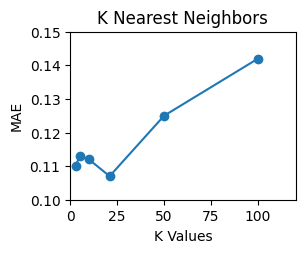

In [35]:
#unweighted kNN graph

mae_knn_values = [.110, .113, .112, .107, .125, .142]

plt.subplot(2, 2, 1)
plt.plot(k_values, mae_knn_values, marker='o')
plt.title('K Nearest Neighbors')
plt.xlabel('K Values')
plt.ylabel('MAE')
plt.axis([0,120,0.10,0.15])

plt.show()

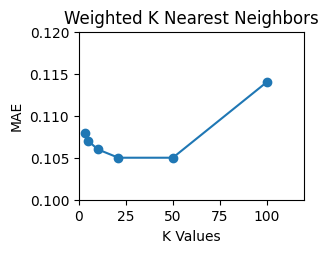

In [33]:
#weighted kNN graph

mae_weighted_knn_values = [.108, .107, .106, .105, .105, .114]

plt.subplot(2, 2, 2)
plt.plot(k_values, mae_weighted_knn_values, marker='o')
plt.title('Weighted K Nearest Neighbors')
plt.xlabel('K Values')
plt.ylabel('MAE')
plt.axis([0,120,0.10,0.12])

plt.show()

In [ ]:
#decision tree graph

mae_dt_values = [.117, .134, .127, .136, .131, .139]

plt.subplot(2, 2, 3)
plt.plot(k_values, mae_dt_values, marker='o')
plt.title('Decision Tree')
plt.xlabel('K Values')
plt.ylabel('MAE')
plt.axis([0,120,0.11,0.145])

plt.show()

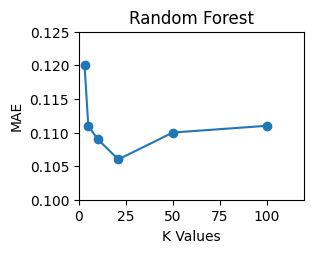

In [51]:
#random forest graph

mae_rf_values = [.120, .111, .109, .106, .110, .111]

plt.subplot(2, 2, 4)
plt.plot(k_values, mae_rf_values, marker='o')
plt.title('Random Forest')
plt.xlabel('K Values')
plt.ylabel('MAE')
plt.axis([0,120,0.10,0.125])

plt.show()

Normalized Data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)
train_data_normalized

In [53]:
#normalized unweighted kNN

knn_unweighted_normalized = neighbors.KNeighborsRegressor(n_neighbors = 25)

knn_unweighted_normalized.fit(train_data_normalized, train_sln)

preds = knn_unweighted_normalized.predict(test_data_normalized)

print("Mean Absolute Error: ", metrics.mean_absolute_error(test_sln, preds))

Mean Absolute Error:  0.12309435897435893


In [54]:
#normalized weighted kNN

knn_weighted_normalized = neighbors.KNeighborsRegressor(n_neighbors = 25, weights = 'distance')

knn_weighted_normalized.fit(train_data_normalized, train_sln)

preds = knn_weighted_normalized.predict(test_data_normalized)

print("Mean Absolute Error: ", metrics.mean_absolute_error(test_sln, preds))

Mean Absolute Error:  0.11355310430619142


In [55]:
#normalized decision tree

regressor_normalized = DecisionTreeRegressor(max_depth = 25)

regressor_normalized.fit(train_data_normalized, train_sln)

preds = regressor.predict(test_data_normalized)

print("Mean Absolute Error: ", metrics.mean_absolute_error(test_sln, preds))

Mean Absolute Error:  0.27276923076923076


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [56]:
#normalized random forest

rf_normalized = RandomForestRegressor(n_estimators = 25, random_state = 42)

rf_normalized.fit(train_data_normalized, train_sln)

preds = rf.predict(test_data_normalized)

print("Mean Absolute Error: ", metrics.mean_absolute_error(test_sln, preds))

Mean Absolute Error:  0.29265666666666673


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


#4. Analysis

What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

This chart might help organize your results:

| **Model**     | **Non-Normalized** | **Normalized** | **Parameter Tuned** |
|---------------|--------------------|----------------|---------------------|
| kNN           |         0.110           |     0.123           |          # of neighbors          |
| w-kNN         |           0.106         |            0.114    |             # of neighbors        |
| decision tree |     0.140               |    0.273            |          max depth           |
| random forest |    0.111                |      0.293          |         # of estimators            |

Having examined the four distinct models (including their normalized and non-normalized versions) and plotted graphs for each, I observed noteworthy findings.

Initially, I was curious to see if a song's liveness and energy influenced its danceability. I hypothesized that songs with greater energy and liveness would be more danceable.

Upon completing the coding process, the data confirmed my hypothesis. The low mean absolute error across all four models indicates a strong correlation between the predictor variables and the target variable.

Comparing the normalized to the non-normalized data I found something interesting. The normalized values are fairly similar to the non-normalized values for kNN and weighted kNN. However, for the decision tree and random forest, the normalized values are nearly double the non-normalized values.

Based on these results, the models that best predict the relationship between energy/liveness and danceability is the weighted kNN for both normalized and non-normalized data. This is because the weighted kNN has the smallest mae's out of all the models. On the contrary, the models that fit the data the worst would be the decision tree and random forest for the normalized data because these models have the highest mae out of all the models.

# 5. Bumps in the Road
What challenges did you encounter? How did you overcome these challenges?

In the course of this project, I encountered several challenges. A primary concern was determining how to accurately graph the refined parameters and identifying an optimal value range for them. To encompass the bulk of the mean absolute error (mae) values, I found it necessary to adopt a broad range, specifically from 3 to 100.